In [2]:
import urllib.request
import time
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import datetime
%matplotlib inline

In [3]:
# Pull data log from server to log.txt on local machine
urllib.request.urlretrieve("http://remote.byu.io:3000/restaurant", './log.txt')

('./log.txt', <http.client.HTTPMessage at 0x1133ea160>)

In [4]:
# Import csv into Pandas dataframe
df = pd.read_csv('./log.txt', header=None, names=['time', 'numPeople'])

In [5]:
df.head()

,time,numPeople
0,1.509632e+09,0
1,1.509632e+09,1
2,1.509632e+09,2
3,1.509632e+09,1
4,1.509632e+09,1


In [6]:
# Find size of data
df.size

137058

In [29]:
numMin = {}
totMin = {}

# Pull data log from server to log.txt on local machine
urllib.request.urlretrieve("http://remote.byu.io:3000/restaurant", './log.txt')
# Open the log file
f = open("./log.txt")

windowStart = 0
windowLen = 5
windowCount = 0
windowTotal = 0
windowMax = 0
windowMin = 1000

dateNum = {}
dateMax = {}
dateAvg = {}
dateTot = {}

timeMaxTot = {}
timeNums = {}

# Process data, binning timestamps into 5 minute windows
for line in f:
    # Strip and split each line by comma
    date, num = line.strip().split(',')
    num = int(num)
    minute = float(date) // 60
    
    # If new time window, add it to various dictionaries
    if windowStart == 0 or minute > windowStart + windowLen - 1:
        if windowStart != 0:
            if time not in timeMaxTot:
                timeMaxTot[time] = dateMax[winDate]
                timeNums[time] = 1
            else:
                timeMaxTot[time] += dateMax[winDate]
                timeNums[time] += 1
            
        windowStart = minute
        winDate = datetime.datetime.utcfromtimestamp(float(date))
        time = winDate.strftime('%H:%M')
        
    if time not in numMin:
        numMin[time] = num
    else:
        numMin[time] += num
        
    if time not in totMin:
        totMin[time] = 1
    else:
        totMin[time] += 1
    
    if winDate not in dateNum:
        dateNum[winDate] = 1
        dateTot[winDate] = num
        dateMax[winDate] = num
        dateAvg[winDate] = num
    else:
        dateNum[winDate] += 1
        dateTot[winDate] += num
        dateMax[winDate] = max(num, dateMax[winDate])
        dateAvg[winDate] = dateTot[winDate]/dateNum[winDate]
        
# Pull just time data, disregarding data
minute = []
avg = []
for time in numMin:
    minute.append(datetime.datetime.strptime(time, '%H:%M'))
    avg.append((numMin[time]/totMin[time]))

119


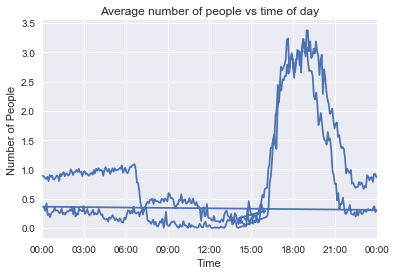

In [31]:
from pytz import timezone
import pytz

# Convert to correct timezone
rotterdam = timezone('Europe/Berlin')
s = minute.index(min(minute))
print(s)

# Fix cyclical nature of data
sortMin = minute[s:] + minute[:s]
sortAvg = avg[s:] + avg[:s]

# Plot data
dates = matplotlib.dates.date2num(sortMin)
plt.plot_date(dates, sortAvg, fmt="-")
plt.xlabel('Time')
plt.ylabel('Number of People')
plt.title("Average number of people vs time of day")
plt.gca().set_xlim([datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1900, 1, 2, 0, 0)])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

(array([ 736635.,  736642.,  736649.,  736656.,  736663.,  736670.]),
 <a list of 6 Text xticklabel objects>)

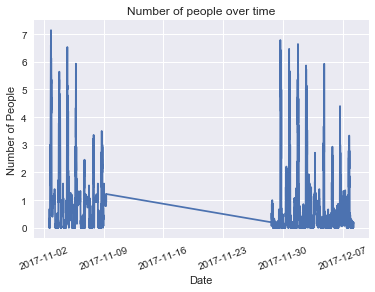

In [20]:
mins = [i for i in dateAvg]
avgs = [dateAvg[i] for i in dateAvg]
dates = matplotlib.dates.date2num(mins)
plt.plot_date(dates, avgs, fmt="-")
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title("Number of people over time")
plt.xticks(rotation=20)